# PyTorch

PyTorch is a cousin of lua-based Torch framework which is actively used at Facebook. PyTorch is one of two most popular deep learning packages currently (middle of 2017). There is a blog to compare PyTorch and TensorFlow, https://medium.com/towards-data-science/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b. 

The reason I learn PyTorch is that from a quick scan of the script of PyTorch, I feel it is a higher level OOP framework, something like lasagna. TensorFlow is lower level package, more like a library. I hope PyTorch can be an quick substitution of lasagna. 

In the mean time, I will keep learning TensorFlow, since many scripts in DL were written using TensorFlow.

Selecting GPU:

CUDA_VISIBLE_DEVICES=1 python myscript.py

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

# Getting Start

In [2]:
x = torch.Tensor(5,3)
print x


 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  9.0351e-20  4.5904e-41
 9.0774e-20  4.5904e-41  1.2840e+31
 4.5904e-41  9.0776e-20  4.5904e-41
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]



In [4]:
# tensor reshape
print x.view(3,-1)


 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  9.0351e-20
 4.5904e-41  9.0774e-20  4.5904e-41  1.2840e+31  4.5904e-41
 9.0776e-20  4.5904e-41  0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 3x5]



In [8]:
x = torch.randn(5,3)
print x
print x.size()


-1.0324 -0.1016  0.7559
-0.0053 -0.4794  0.1800
 2.4485  0.1967  0.7246
-0.4247  0.7943 -0.0477
 1.5462  0.0154 -0.7899
[torch.FloatTensor of size 5x3]

torch.Size([5, 3])


In [9]:
y = torch.rand(5, 3)
print x + y


-0.7656  0.7966  1.5280
 0.7839 -0.1302  1.0259
 3.0509  0.5817  1.3065
 0.0098  1.7583  0.0983
 1.6064  0.0205  0.0824
[torch.FloatTensor of size 5x3]



In [10]:
print torch.add(x, y)


-0.7656  0.7966  1.5280
 0.7839 -0.1302  1.0259
 3.0509  0.5817  1.3065
 0.0098  1.7583  0.0983
 1.6064  0.0205  0.0824
[torch.FloatTensor of size 5x3]



In [11]:
print y.add_(x)


-0.7656  0.7966  1.5280
 0.7839 -0.1302  1.0259
 3.0509  0.5817  1.3065
 0.0098  1.7583  0.0983
 1.6064  0.0205  0.0824
[torch.FloatTensor of size 5x3]



In [12]:
print x[:,1]


-0.1016
-0.4794
 0.1967
 0.7943
 0.0154
[torch.FloatTensor of size 5]



In [13]:
print x.numpy()

[[-1.03235364 -0.10163616  0.75592828]
 [-0.00525058 -0.47940958  0.18004213]
 [ 2.44849706  0.19670597  0.72456259]
 [-0.42473835  0.79431796 -0.04774026]
 [ 1.54624712  0.01543958 -0.78989881]]


In [14]:
a = x.numpy()
x.add_(1)
print a # a is only a numpy reference of x 

[[-0.03235364  0.89836383  1.75592828]
 [ 0.99474943  0.52059042  1.18004215]
 [ 3.44849706  1.19670594  1.72456264]
 [ 0.57526165  1.79431796  0.95225972]
 [ 2.54624701  1.01543963  0.21010119]]


In [15]:
y = torch.from_numpy(a)
print y


-0.0324  0.8984  1.7559
 0.9947  0.5206  1.1800
 3.4485  1.1967  1.7246
 0.5753  1.7943  0.9523
 2.5462  1.0154  0.2101
[torch.FloatTensor of size 5x3]



In [16]:
x.add_(1)
print y # from_numpy() also creates a reference of numpy array


 0.9676  1.8984  2.7559
 1.9947  1.5206  2.1800
 4.4485  2.1967  2.7246
 1.5753  2.7943  1.9523
 3.5462  2.0154  1.2101
[torch.FloatTensor of size 5x3]



In [17]:
import numpy as np
np.add(a, 1, out=a)
print a
print x
print y

[[ 1.96764636  2.89836383  3.75592828]
 [ 2.99474955  2.52059031  3.18004227]
 [ 5.44849682  3.19670582  3.72456264]
 [ 2.57526159  3.79431796  2.95225978]
 [ 4.54624701  3.01543951  2.21010113]]

 1.9676  2.8984  3.7559
 2.9947  2.5206  3.1800
 5.4485  3.1967  3.7246
 2.5753  3.7943  2.9523
 4.5462  3.0154  2.2101
[torch.FloatTensor of size 5x3]


 1.9676  2.8984  3.7559
 2.9947  2.5206  3.1800
 5.4485  3.1967  3.7246
 2.5753  3.7943  2.9523
 4.5462  3.0154  2.2101
[torch.FloatTensor of size 5x3]



# Autograd: automatic differentiation
Autograd is the core package of pytorch. The Autograd package provides automatic differentiation for all operations on Tensors. Variable is the central class of the package. Another important class is Function. Variable and Function are interconnected and build up an acyclic graph, that encodes a complete history of computation. 

In [12]:
from torch.autograd import Variable
x = Variable(torch.ones(2,2), requires_grad=True)
print x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [13]:
y = x + 2
print y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [4]:
print(y.grad_fn)

In [14]:
z = y * y * 3
out = z.mean()
out.backward()

In [16]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [19]:
x = Variable(torch.FloatTensor([[1,2],[3,4]]), requires_grad=True)
y = x + 2
z = y * y

gradient = torch.ones(2, 2)
z.backward(gradient)
print(x.grad)

Variable containing:
  6   8
 10  12
[torch.FloatTensor of size 2x2]



In [18]:
gradient


 1  1
 1  1
[torch.FloatTensor of size 2x2]

# Neural Networks
Neural Networks can be constructed using the torch.nn package.

In [8]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
#     def num_flat_features(self, x):
#         size = x.size()[1:]
#         num_features = 1
#         for s in size:
#             num_features *= s
#         return num_features
    
net = Net()
print net

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [26]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) 

10
torch.Size([6, 1, 5, 5])


In [27]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
 0.0981  0.0958  0.1111  0.1043  0.1003  0.0894  0.1022  0.0970  0.0968  0.1050
[torch.FloatTensor of size 1x10]



In [43]:
import numpy as np
criterion = nn.CrossEntropyLoss()
target = Variable(torch.LongTensor(1).random_(10))
loss = criterion(out, target)
print(loss)

Variable containing:
 2.2915
[torch.FloatTensor of size 1]



In [44]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [45]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
Variable containing:
1.00000e-03 *
 -0.7940
  1.8531
 -1.3289
 -0.9864
 -0.4830
 -0.1012
[torch.FloatTensor of size 6]



## Update the weights
The simplest update rule used in practice is the Stochastic Gradient Descent (SGD):

In [46]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [47]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

# Train a network

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# Download CIFAR10
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# from torch.utils import data
# import os
# transform = transforms.Compose([transforms.ToTensor(), 
#                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# class CIFAR10(data.Dataset):
#     def __init__(self, root, transform=transform, train=True, test=False):
#         self.test = test
#         imgs = 
#         if self.test:
#             imgs = [os.path.join(root, batch) for batch in os.listdir(root) if 'test' in batch]
#         else:
#             imgs = [os.path.join(root, batch) for batch in os.listdir(root) if 'data_batch' in batch]
#         batch_num = len(imgs)
        
    

  cat  deer   cat truck


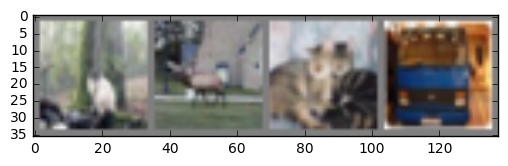

In [6]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [12]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.228
[1,  4000] loss: 1.891
[1,  6000] loss: 1.719
[1,  8000] loss: 1.597
[1, 10000] loss: 1.545
[1, 12000] loss: 1.464
[2,  2000] loss: 1.394
[2,  4000] loss: 1.342
[2,  6000] loss: 1.354
[2,  8000] loss: 1.310
[2, 10000] loss: 1.290
[2, 12000] loss: 1.262
[3,  2000] loss: 1.196
[3,  4000] loss: 1.193
[3,  6000] loss: 1.192
[3,  8000] loss: 1.195
[3, 10000] loss: 1.172
[3, 12000] loss: 1.162
[4,  2000] loss: 1.090
[4,  4000] loss: 1.105
[4,  6000] loss: 1.083
[4,  8000] loss: 1.092
[4, 10000] loss: 1.085
[4, 12000] loss: 1.105
[5,  2000] loss: 1.020
[5,  4000] loss: 1.017
[5,  6000] loss: 1.023
[5,  8000] loss: 1.036
[5, 10000] loss: 1.024
[5, 12000] loss: 1.028
Finished Training


# Deep Learning for Natural Language Processing with Pytorch
https://github.com/rguthrie3/DeepLearningForNLPInPytorch/blob/master/Deep%20Learning%20for%20Natural%20Language%20Processing%20with%20Pytorch.ipynb
## Example: Logistic regression Bag-of-Words classifier
A sparse BOW representation is the accounts of words in the vocabulary

In [25]:
data = [ ("me gusta comer en la cafeteria".split(), "SPANISH"),
         ("Give it to me".split(), "ENGLISH"),
         ("No creo que sea una buena idea".split(), "SPANISH"),
         ("No it is not a good idea to get lost at sea".split(), "ENGLISH") ]

test_data = [ ("Yo creo que si".split(), "SPANISH"),
              ("it is lost on me".split(), "ENGLISH")]

word_to_ix = {}
for sent, _ in data + test_data:
    for word in sent:
        if word not in word_to_ix.keys():
            word_to_ix[word] = len(word_to_ix)
print word_to_ix
VOCAB_SIZE = len(word_to_ix)
NUM_LABELS = 2

{'en': 3, 'No': 9, 'buena': 14, 'it': 7, 'at': 22, 'sea': 12, 'cafeteria': 5, 'Yo': 23, 'la': 4, 'to': 8, 'creo': 10, 'is': 16, 'a': 18, 'good': 19, 'get': 20, 'idea': 15, 'que': 11, 'not': 17, 'me': 0, 'on': 25, 'gusta': 1, 'lost': 21, 'Give': 6, 'una': 13, 'si': 24, 'comer': 2}


In [33]:
class BoWClassifier(nn.Module):
    def __init__(self, num_labels, vocab_size):
        super(BoWClassifier, self).__init__()
        self.linear = nn.Linear(vocab_size, num_labels)
        
    def forward(self, bow_vec):
        return F.log_softmax(self.linear(bow_vec))

In [34]:
def make_bow_vector(sentence, word_to_ix):
    vec = torch.zeros(len(word_to_ix))
    for word in sentence:
        vec[word_to_ix[word]] += 1
    return vec.view(1, -1)

def make_target(label, label_to_ix):
    return torch.LongTensor([label_to_ix[label]])

In [35]:
model = BoWClassifier(NUM_LABELS, VOCAB_SIZE)
for param in model.parameters():
    print param

Parameter containing:

Columns 0 to 9 
 0.1215  0.1723  0.1543 -0.0962 -0.1234  0.0848  0.1959 -0.1881 -0.0867 -0.0835
-0.0993 -0.1147 -0.0486 -0.1311 -0.0700  0.1010 -0.0064  0.0843 -0.0817 -0.0035

Columns 10 to 19 
 0.0722 -0.1915  0.1567 -0.1488 -0.0467 -0.1152  0.0000  0.1311  0.0844 -0.0003
-0.0164  0.0511 -0.1521  0.1177 -0.0446  0.0133 -0.0806 -0.0430 -0.1918 -0.1205

Columns 20 to 25 
-0.0669  0.0941 -0.0078  0.0043  0.0881  0.0787
 0.0990  0.0249  0.1469 -0.0531 -0.1881 -0.1672
[torch.FloatTensor of size 2x26]

Parameter containing:
 0.1180
 0.0528
[torch.FloatTensor of size 2]



In [40]:
sample = data[0]
bow_vector = make_bow_vector(sample[0], word_to_ix)
log_probs = model(Variable(bow_vector))
print log_probs

Variable containing:
-0.0102 -4.5878
[torch.FloatTensor of size 1x2]



In [37]:
label_to_ix = {"SPANISH": 0, "ENGLISH": 1}
for instance, label in test_data:
    bow_vec = Variable(make_bow_vector(instance, word_to_ix))
    log_probs = model(bow_vec)
    # print log_probs
print next(model.parameters())[:, word_to_ix["creo"]]

Variable containing:
1.00000e-02 *
  7.2190
 -1.6414
[torch.FloatTensor of size 2]



In [38]:
import torch.optim as optim
loss_func = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
for epoch in xrange(100):
    for instance, label in data:
        # Step 1. Remember that Pytorch accumulates gradients.  We need to clear them out
        # before each instance
        model.zero_grad()
        
        bow_vec = Variable(make_bow_vector(instance, word_to_ix))
        target = Variable(make_target(label, label_to_ix))
        
        log_probs = model(bow_vec)
        loss = loss_func(log_probs, target)
        loss.backward()
        optimizer.step()
        

In [39]:
for instance, label in test_data:
    bow_vec = Variable(make_bow_vector(instance, word_to_ix))
    log_probs = model(bow_vec)
    # print log_probs
print next(model.parameters())[:, word_to_ix["creo"]]

Variable containing:
 0.5346
-0.4788
[torch.FloatTensor of size 2]



## Word Embeddings in Pytorch

In [66]:
embeds = nn.Embedding(200, 5)
word_to_ix = {'hello': 0, 'world': 1}
lookup_tensor = torch.LongTensor([word_to_ix['hello']])
hello_embed = embeds(Variable(lookup_tensor))
print hello_embed

Variable containing:
-1.2736  0.7297  0.9872  1.0912  0.3694
[torch.FloatTensor of size 1x5]



In [68]:
embeds(Variable(torch.LongTensor([1])))

Variable containing:
 0.0395  1.1353 -1.1373 -0.6211 -0.7735
[torch.FloatTensor of size 1x5]

In [70]:
input = Variable(torch.LongTensor([[1,2,4,5],[4,3,2,9], [123, 111, 34, 199]]))
print embeds(input)

Variable containing:
(0 ,.,.) = 
  0.0395  1.1353 -1.1373 -0.6211 -0.7735
  1.0080  0.6424  1.2418  0.9487 -0.3626
  1.0605  0.0489  0.1647  0.2967  0.2756
 -0.2600  0.2853  0.5122 -0.0844  1.0153

(1 ,.,.) = 
  1.0605  0.0489  0.1647  0.2967  0.2756
 -0.6193 -0.6049 -0.1815 -0.5564  0.3293
  1.0080  0.6424  1.2418  0.9487 -0.3626
 -0.8049 -0.6090  1.4048  0.8847 -0.2563

(2 ,.,.) = 
  0.6554 -0.2089  0.6825 -0.4455  0.2637
 -1.1984  0.7240 -1.6935  0.4210  0.4130
  2.5810 -0.1900 -0.0077 -0.9142  1.2588
 -0.3416 -0.0144  0.4821 -1.3730 -0.1853
[torch.FloatTensor of size 3x4x5]



In [69]:
input = Variable(torch.LongTensor([[1,2,4,5],[4,5,2,9], [123, 111, 34, 199]]))
print embeds(input)

Variable containing:
(0 ,.,.) = 
  0.0395  1.1353 -1.1373 -0.6211 -0.7735
  1.0080  0.6424  1.2418  0.9487 -0.3626
  1.0605  0.0489  0.1647  0.2967  0.2756
 -0.2600  0.2853  0.5122 -0.0844  1.0153

(1 ,.,.) = 
  1.0605  0.0489  0.1647  0.2967  0.2756
 -0.2600  0.2853  0.5122 -0.0844  1.0153
  1.0080  0.6424  1.2418  0.9487 -0.3626
 -0.8049 -0.6090  1.4048  0.8847 -0.2563

(2 ,.,.) = 
  0.6554 -0.2089  0.6825 -0.4455  0.2637
 -1.1984  0.7240 -1.6935  0.4210  0.4130
  2.5810 -0.1900 -0.0077 -0.9142  1.2588
 -0.3416 -0.0144  0.4821 -1.3730 -0.1853
[torch.FloatTensor of size 3x4x5]



In [52]:
input = Variable(torch.LongTensor([[1,2,4,5],[4,3,2,9]]))
print embeds(input)

Variable containing:
(0 ,.,.) = 
 -0.0264  1.5171  0.3488  0.4852 -0.6027
 -0.9081 -0.6696 -0.3116 -0.3267  1.5800
 -1.4643  0.2359 -1.1807  0.2145  1.0106
 -0.8529 -0.7926  1.4235  0.4567 -0.5870

(1 ,.,.) = 
 -1.4643  0.2359 -1.1807  0.2145  1.0106
 -0.4028  0.7049  0.6485  0.8050 -1.4069
 -0.9081 -0.6696 -0.3116 -0.3267  1.5800
 -0.5471 -2.5449  0.2827  1.1465 -2.0642
[torch.FloatTensor of size 2x4x5]



## An Example: N-Gram Language Modeling
In an N-gram language model, given a sequence of words $\boldsymbol{w}$, we want to calculate $$P(\boldsymbol{w}_i |\boldsymbol{w}_{i-1}, \boldsymbol{w}_{i-2},...,\boldsymbol{w}_{i-n+1})$$

In [59]:
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
trigrams = [ ([test_sentence[i], test_sentence[i+1]], test_sentence[i+2]) 
            for i in xrange(len(test_sentence) - 2) ]
print trigrams[:3] # print the first 3, just so you can see what they look like

[(['When', 'forty'], 'winters'), (['forty', 'winters'], 'shall'), (['winters', 'shall'], 'besiege')]


In [60]:
vocab = set(test_sentence)
word_to_ix = { word: i for i, word in enumerate(vocab) }

In [61]:
class NGramLanguageModeler(nn.Module):
    def __init__(self, vocab_size, embedding_dim, contex_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(contex_size*embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)
        
    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out  = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs

In [62]:
# train the N-gram modeller
losses = []
loss_func = nn.NLLLoss() # negative log likelihood loss
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)
for epoch in xrange(10):
    total_loss = torch.Tensor([0])
    for context, target in trigrams:
        context_ids = map(lambda w: word_to_ix[w], context)
        context_var = Variable(torch.LongTensor(context_ids))
        model.zero_grad()
        
        # Forward pass
        log_probs = model(context_var)
        
        # loss calculation
        loss = loss_func(log_probs, Variable(torch.LongTensor([word_to_ix[target]])))
        
        # These two lines to backpropagate the gradients
        loss.backward()
        optimizer.step()
        
        total_loss += loss.data
        
    losses.append(total_loss)

[
 520.7645
[torch.FloatTensor of size 1]
, 
 518.1257
[torch.FloatTensor of size 1]
, 
 515.5073
[torch.FloatTensor of size 1]
, 
 512.9072
[torch.FloatTensor of size 1]
, 
 510.3231
[torch.FloatTensor of size 1]
, 
 507.7555
[torch.FloatTensor of size 1]
, 
 505.2031
[torch.FloatTensor of size 1]
, 
 502.6666
[torch.FloatTensor of size 1]
, 
 500.1425
[torch.FloatTensor of size 1]
, 
 497.6327
[torch.FloatTensor of size 1]
]


## Computing Word Embeddings: Continuous Bag-of-Words

In [71]:
CONTEXT_SIZE = 2 # 2 words to the left, 2 to the right
raw_text = """We are about to study the idea of a computational process. Computational processes are abstract
beings that inhabit computers. As they evolve, processes manipulate other abstract
things called data. The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()
word_to_ix = { word: i for i, word in enumerate(set(raw_text)) }
data = []
for i in xrange(2, len(raw_text) - 2):
    context = [ raw_text[i-2], raw_text[i-1], raw_text[i+1], raw_text[i+2] ]
    target = raw_text[i]
    data.append( (context, target) )


In [72]:
def make_context_vector(context, word_to_ix):
    idxs = map(lambda w: word_to_ix[w], context)
    tensor = torch.LongTensor(idxs)
    return Variable(tensor)

def make_bow_vector(context, word_to_ix):
    vec = torch.zeros(len(word_to_ix))
    for word in context:
        vec[word_to_ix[word]] += 1
    return vec.view(1, -1)

In [73]:
class CBOW(nn.Module):    
    def __init__(self, vocab_size):
        super(CBOW, self).__init__()
        self.linear1 = nn.Linear(vocab_size, 128)
        self.linear2 = nn.Linear(128, vocab_size)
    
    def forward(self, inputs):
        out  = F.relu(self.linear1(inputs))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs

In [79]:
losses = []
loss_func = nn.NLLLoss() # negative log likelihood loss
model = CBOW(len(word_to_ix))
optimizer = optim.SGD(model.parameters(), lr=0.1)
for epoch in xrange(10):
    total_loss = torch.Tensor([0])
    for context, target in data:
        var = make_bow_vector(context, word_to_ix)
        context_var = Variable(var)
        model.zero_grad()
        log_probs = model(context_var)
        loss = loss_func(log_probs, Variable(torch.LongTensor([word_to_ix[target]])))
        loss.backward()
        optimizer.step()
    
        total_loss += loss.data
    losses.append(total_loss)
print [l.numpy()[0] for l in losses]

[229.69312, 215.81284, 201.60854, 183.66568, 161.35608, 135.41714, 107.79294, 80.314232, 55.701283, 36.259663]


In [84]:
var = make_bow_vector(data[0][0], word_to_ix)
context_var = Variable(var)
log_probs = model(context_var)
print log_probs

Variable containing:

Columns 0 to 9 
-7.2214 -6.3702 -6.2719 -4.7851 -4.9109 -4.6341 -5.5069 -5.5617 -8.0884 -8.3384

Columns 10 to 19 
-6.1867 -5.4796 -6.3402 -8.2558 -6.0848 -3.9520 -6.2371 -5.0020 -2.8756 -6.0695

Columns 20 to 29 
-6.3726 -5.9439 -6.6080 -6.0338 -6.2106 -5.8786 -6.3464 -6.9704 -4.1798 -3.7702

Columns 30 to 39 
-6.2340 -6.5747 -5.8984 -6.2081 -6.8566 -6.5445 -0.2958 -4.7308 -6.5982 -6.8579

Columns 40 to 48 
-6.3361 -7.9958 -4.3196 -4.9828 -5.9037 -6.7964 -4.0582 -6.9834 -7.3138
[torch.FloatTensor of size 1x49]



In [86]:
word_to_ix[data[0][1]]

36

## Sequence Models and Long-Short Term Memory Networks

In [107]:
rnn = nn.LSTM(10, 3, 2)
input = Variable(torch.randn(5, 1, 10))
h0 = Variable(torch.randn(2 * 4, 1, 3)) # Multiply 2 because of bidirection
c0 = Variable(torch.randn(2 * 4, 1, 3))
output, hn = rnn(input, (h0, c0))
print output.size()
print hn[0].size()

torch.Size([5, 1, 3])
torch.Size([2, 1, 3])


## Data Loading and Processing 

In [108]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 32.  65.]
 [ 33.  76.]
 [ 34.  86.]
 [ 34.  97.]]


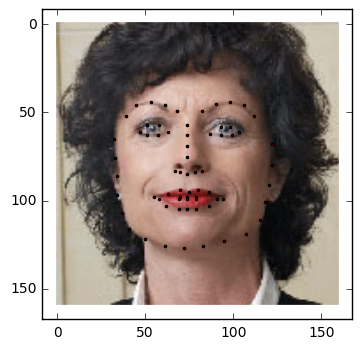

In [111]:
landmarks_frame = pd.read_csv('data/faces/face_landmarks.csv')

n = 65
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated
    
plt.figure()
show_landmarks(io.imread(os.path.join('data/faces/', img_name)),
               landmarks)
plt.show()

The toy dataset has been save in data/face. I need to design a dataset class.

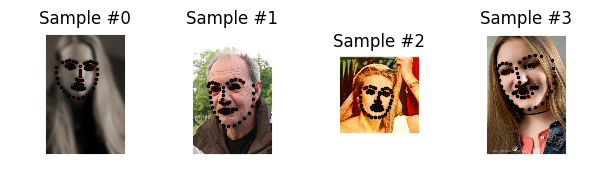

In [117]:
class FaceLandmarksDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        super(FaceLandmarksDataset, self).__init__()
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.landmarks_frame)
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}
        
        if self.transform:
            sample = self.transform(sample)
        return sample
    

face_dataset = FaceLandmarksDataset(csv_file = 'data/faces/face_landmarks.csv', 
                                   root_dir = 'data/faces/')

for i in range(len(face_dataset)):
    sample = face_dataset[i]
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)
    if i == 3:
        plt.show()
        break

In [119]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}


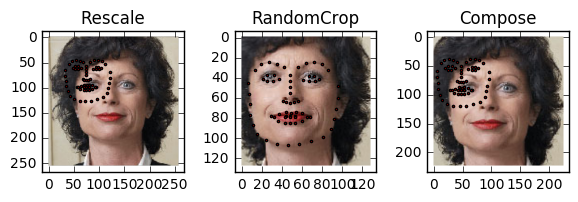

In [125]:
scale = Rescale(256)
crop = RandomCrop(128)
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()


(0, torch.Size([4, 3, 224, 224]), torch.Size([4, 68, 2]))
(1, torch.Size([4, 3, 224, 224]), torch.Size([4, 68, 2]))
(2, torch.Size([4, 3, 224, 224]), torch.Size([4, 68, 2]))
(3, torch.Size([4, 3, 224, 224]), torch.Size([4, 68, 2]))


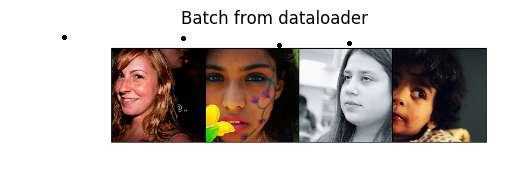

In [128]:
transformed_dataset = FaceLandmarksDataset(csv_file='data/faces/face_landmarks.csv',
                                           root_dir='data/faces/',
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224),
                                               ToTensor()
                                           ]))

dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
                    landmarks_batch[i, :, 1].numpy(),
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

## Attention-basd Neural Machine Translation

### Sequence to sequence model
a model consisting of two separate RNNs called the encoder and decoder. The encoder reads an input sequence one item at a time, and outputs a vector at each step. The final output of the encoder is kept as the context vector. The decoder uses this context vector to produce a sequence of outputs one step at a time.
<img src="https://camo.githubusercontent.com/d1b7a9145cd2a5e988096e08d5029b4960fe221d/68747470733a2f2f692e696d6775722e636f6d2f74567448684e702e706e67">

### The Attention Mechanism
